In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


🔍 Erste 10 Trainings-Dateinamen im Ordner (sortiert):
['--NSVcUgfVhFd6uzkqHOOg.jpg', '--SWG8TJo7vrbZ_x5YLj6A.jpg', '--WOpVBuHlCygAUADkttpg.jpg', '--jRsD9anHdGxv4ZOCQktA.jpg', '--tczNya4_w5IhU9DeRMHw.jpg', '--vWKSR3Rh8quTfK4AuKOQ.jpg', '--zBInAo8-NDrBCfvJ4fEw.jpg', '-0C1J9CvgFP4BTVLXNeNZA.jpg', '-0GQmYRienNVqEKiQ0Mkyw.jpg', '-0Q9X3KqBrhdlGzap-YToQ.jpg']

🔍 Erste 10 extrahierte Trainings-Image-IDs:
['--NSVcUgfVhFd6uzkqHOOg', '--SWG8TJo7vrbZ_x5YLj6A', '--WOpVBuHlCygAUADkttpg', '--jRsD9anHdGxv4ZOCQktA', '--tczNya4_w5IhU9DeRMHw', '--vWKSR3Rh8quTfK4AuKOQ', '--zBInAo8-NDrBCfvJ4fEw', '-0C1J9CvgFP4BTVLXNeNZA', '-0GQmYRienNVqEKiQ0Mkyw', '-0Q9X3KqBrhdlGzap-YToQ']

📸 Anzeige des ersten Bildes: Mapilarry_Vistas/training/images/--NSVcUgfVhFd6uzkqHOOg.jpg


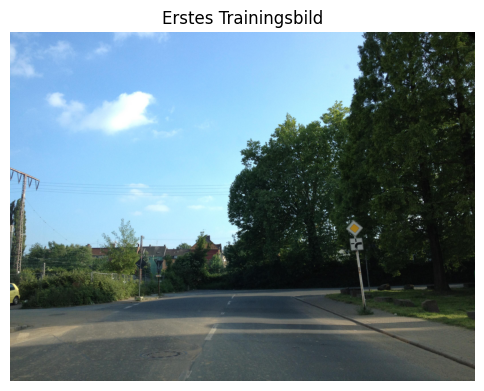

In [3]:
# Verzeichnisse mit den Bildern
TRAIN_IMAGE_DIR = "Mapilarry_Vistas/training/images"
VAL_IMAGE_DIR = "Mapilarry_Vistas/validation/images"

# Dateien alphabetisch sortieren
sorted_train_files = sorted(os.listdir(TRAIN_IMAGE_DIR))
sorted_val_files = sorted(os.listdir(VAL_IMAGE_DIR))

# Extrahiere die Bild-IDs (ohne Dateiendung)
train_image_ids = [os.path.splitext(f)[0] for f in sorted_train_files if f.endswith((".jpg", ".png"))]
val_image_ids = [os.path.splitext(f)[0] for f in sorted_val_files if f.endswith((".jpg", ".png"))]

# Debugging: Erste 10 Dateinamen vor der ID-Extraktion
print("🔍 Erste 10 Trainings-Dateinamen im Ordner (sortiert):")
print(sorted_train_files[:10])

# Debugging: Erste 10 extrahierte IDs
print("\n🔍 Erste 10 extrahierte Trainings-Image-IDs:")
print(train_image_ids[:10])

# Versuche, das erste Bild zu laden und anzuzeigen
first_image_path = os.path.join(TRAIN_IMAGE_DIR, sorted_train_files[0])
try:
    first_image = Image.open(first_image_path)
    print(f"\n📸 Anzeige des ersten Bildes: {first_image_path}")

    # Bild anzeigen
    plt.figure(figsize=(6, 6))
    plt.imshow(first_image)
    plt.axis("off")
    plt.title("Erstes Trainingsbild")
    plt.show()

except Exception as e:
    print(f"\n❌ Fehler beim Laden des ersten Bildes: {e}")
